Estimate pi

1. Initialize circle points, square points and interval to 0.
 2. Generate random point x.
 3. Generate random point y.
 4. Calculate d = x*x + y*y.
 5. If d <= 1, increment circle points.
 6. Increment square points.
 7. Increment interval.
 8. If increment < NOOFITERATIONS, repeat from 2.
 9. Calculate pi = 4*(circle points/square points).
 10. Terminate.

In [1]:
import random

In [40]:
C=0
S=0
I=0
for i in range(100):
    x= random.random()
    y=random.random()
    d=x*x + y*y
    if d<=1:
        C+=1
    S+=1
    I+=1
pi= 4*(C/S)
print (pi)



3.16


Estimated value of π: 3.1436


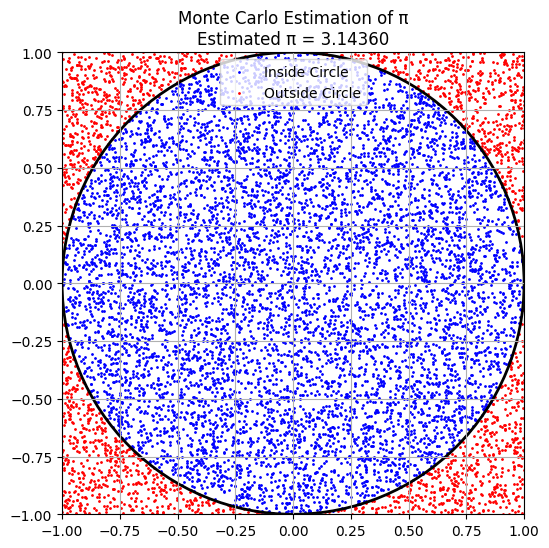

In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
circle_points = 0
square_points = 0
NOOFITERATION = 10000  # Number of random points

x_inside = []
y_inside = []
x_outside = []
y_outside = []

# Monte Carlo simulation
for _ in range(NOOFITERATION):
    x = random.uniform(-1, 1)  # Generate random x between -1 and 1
    y = random.uniform(-1, 1)  # Generate random y between -1 and 1
    
    d = x*x + y*y  # Calculate squared distance from origin
    
    if d <= 1:
        circle_points += 1  # Point inside the circle
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

    square_points += 1  # Point inside the square

# Estimate π
estimated_pi = 4 * (circle_points / square_points)
print(f"Estimated value of π: {estimated_pi}")

# Plot the figure
fig, ax = plt.subplots(figsize=(6,6))

# Plot points inside the circle
ax.scatter(x_inside, y_inside, color='blue', s=1, label="Inside Circle")

# Plot points outside the circle
ax.scatter(x_outside, y_outside, color='red', s=1, label="Outside Circle")

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
ax.add_patch(circle)

# Set square limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')  # Keep the aspect ratio square
plt.title(f"Monte Carlo Estimation of π\nEstimated π = {estimated_pi:.5f}")
plt.legend()
plt.grid(True)
plt.show()

## Importance Sampling

 Algorithm:
 1. Start
 2. import required libraries like random, numpy ..
 3. Define n, functions, initialize summ etc
 4. start loop over n
 5. generate random numbers x ∈ (0,1)
 6. define function y(x) using above formula from x as
 y(x) = e
 e−1
 (1−e−x)
 7. Get sum of the function exp(−y2(x))
 8. close the loop
 exp(−y(x))
 9. Find the integration value i.e.
 Dexp(−y2(x))
 exp(−y(x))
 E
 10. You also find variance and hence the error.

In [1]:
import numpy as np

In [2]:
import random

In [11]:
n=10000
sum_fx = 0 
sum_fx2 = 0

In [12]:
def y(x):
    return (np.e / (np.e - 1)) * (1 - np.exp(-x))


In [13]:
# Step 4-8: Loop over n samples
for _ in range(n):
    x = np.random.uniform(0, 1)  # Step 5: Generate x from (0,1)
    y_x = y(x)  # Step 6: Apply function y(x)
    
    # Step 7: Compute function values
    fx = np.exp(-y_x**2) / np.exp(-y_x)
    
    sum_fx += fx
    sum_fx2 += fx**2

# Step 9: Compute integral estimate
integral_estimate = sum_fx / n

# Step 10: Compute variance and error
variance = (sum_fx2 / n) - (integral_estimate ** 2)
error = np.sqrt(variance / n)

# Display results
print(f"Estimated Integral: {integral_estimate}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Estimated Integral: 1.178231673469944
Variance: 0.007584065520234828
Error: 0.0008708654040800351


## Evaluate I using p(x) and evaluate Importance sampling

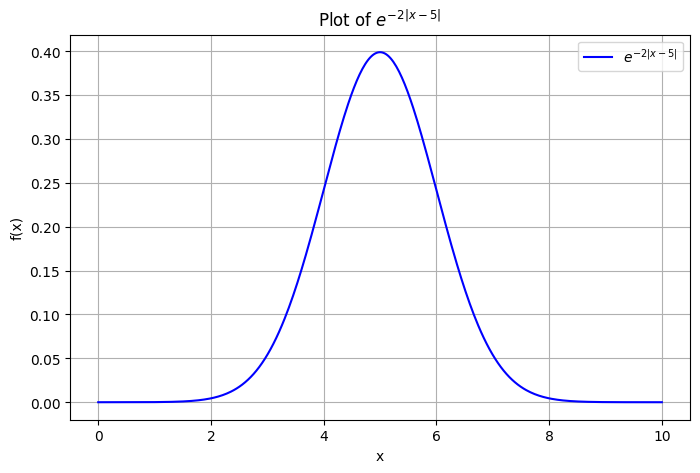

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = exp(-2 * |x - 5|)
def f(x):
   return (1 / np.sqrt(2 * np.pi)) * np.exp(-((x - 5) ** 2) / 2)


# Generate x values from 0 to 10
x_values = np.linspace(0, 10, 400)
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=r'$e^{-2 |x - 5|}$', color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of $e^{-2 |x - 5|}$")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [16]:
print(f(1000))

0.0


## Acceptance-Rejection Method

TypeError: float() argument must be a string or a real number, not 'function'

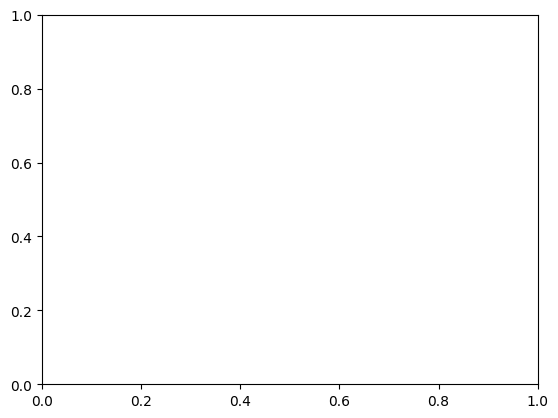

In [ ]:
def sample(function, xmin=0, xmax=1, ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < function(x):
            return x
    
samps = [sample(f) for i in range(10)]
plt.plot(xs, ys, label="f(x)")
plt.hist(samps, density=True, alpha=0.2, label="Sample distribution")
plt.xlim(0, 1), plt.ylim(0, 1.4), plt.xlabel("x"), plt.ylabel("y"),
plt.legend()
